In [ ]:
import pandas as pd
import numpy as np
import pickle

data = pd.read_csv("artifacts/train.csv")  

with open("artifacts/preprocessor.pkl", "rb") as f:
    preprocessor = pickle.load(f)

X = data.drop("math_score", axis=1)
y = data["math_score"]

X_processed = preprocessor.transform(X)


c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator SimpleImputer from version 1.3.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.2 when using version 1.6.1. This might lead to breaking code o

               reading_score  writing_score  math_score
reading_score       1.000000       0.955853    0.814820
writing_score       0.955853       1.000000    0.802409
math_score          0.814820       0.802409    1.000000


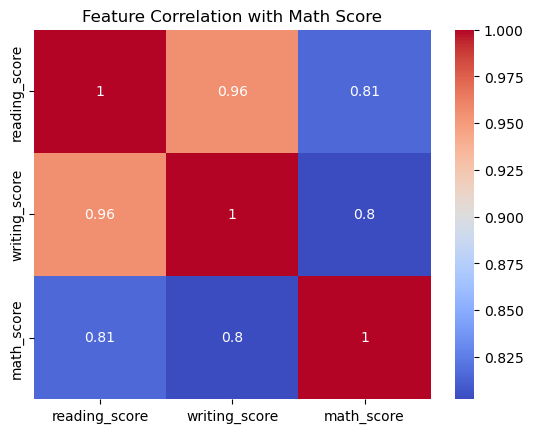

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ["reading_score", "writing_score"]  
data_numeric = data[numeric_cols + ["math_score"]]

corr = data_numeric.corr()
print(corr)

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Feature Correlation with Math Score")
plt.show()


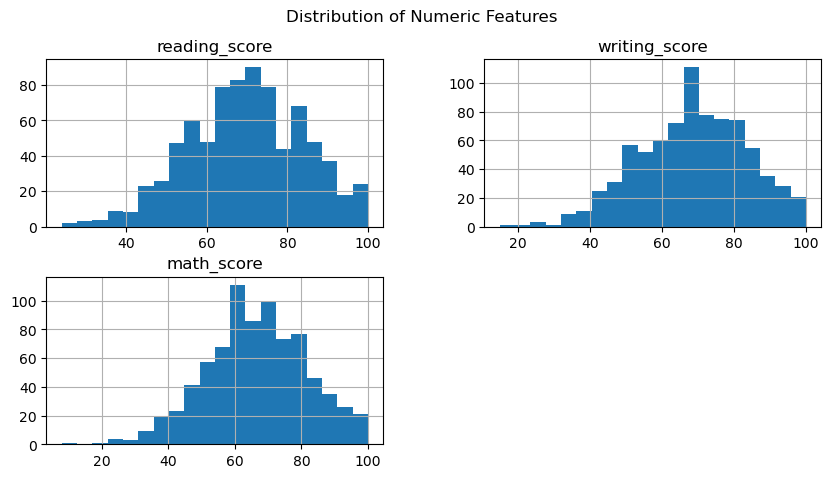

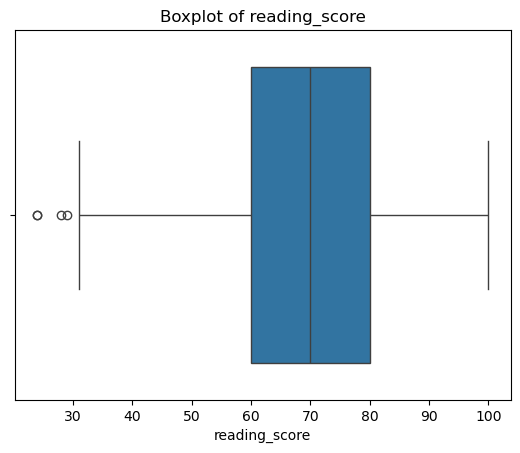

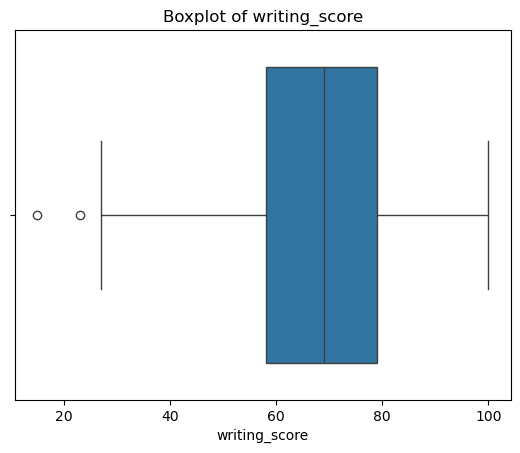

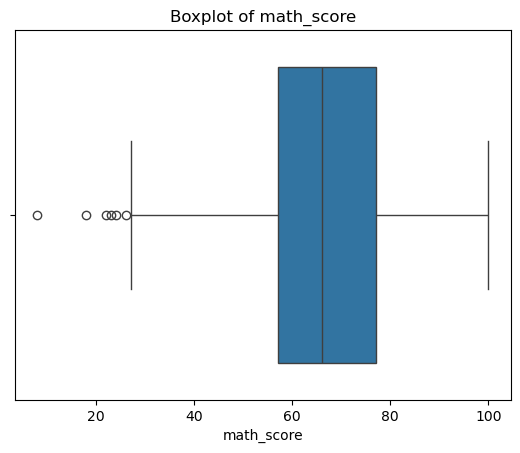

In [ ]:
data_numeric.hist(bins=20, figsize=(10,5))
plt.suptitle("Distribution of Numeric Features")
plt.show()

for col in numeric_cols + ["math_score"]:
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


In [ ]:
from scipy.stats import ttest_ind, f_oneway

group_standard = data[data["lunch"]=="standard"]["math_score"]
group_free = data[data["lunch"]=="free"]["math_score"]

t_stat, p_val = ttest_ind(group_standard, group_free)
print("T-test for Lunch Type:", t_stat, p_val)



T-test for Lunch Type: nan nan


c:\Users\Admin\anaconda3\Lib\site-packages\scipy\_lib\deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


In [8]:
groups = [data[data["race_ethnicity"]==g]["math_score"] for g in data["race_ethnicity"].unique()]
f_stat, p_val = f_oneway(*groups)
print("ANOVA for Race/Ethnicity:", f_stat, p_val)


ANOVA for Race/Ethnicity: 11.67016450456985 3.254286633211517e-09
